In [23]:
#Source: CS51 1.1
# Import useful packages
import pandas
pandas.set_option('max_rows', 10)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns # very nice plotting package

# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

# importing dataset downloaded from Openintro.org
data = pandas.read_csv(r"C:\Users\alina\OneDrive\Desktop\Cornerstone Courses\ASSIGNMENTS\births.csv")

#prints summary statistics for data
data.describe()








f_age       m_age       weeks      visits      gained      weight
count  118.000000  148.000000  148.000000  147.000000  148.000000  148.000000
mean    29.796610   26.547297   38.547297   11.564626   32.452703    7.039865
std      6.170732    6.202188    2.766010    3.590452   15.657618    1.506418
min     17.000000   15.000000   26.000000    2.000000    0.000000    1.630000
25%     25.000000   22.000000   38.000000   10.000000   22.750000    6.425000
50%     29.500000   25.000000   39.000000   12.000000   30.500000    7.310000
75%     34.000000   31.000000   40.000000   14.500000   40.000000    8.000000
max     47.000000   41.000000   44.000000   19.000000   85.000000   10.130000

In [2]:
#Source: CS51 1.2
def regression_model(column_x, column_y):
    # defines a function with built-in library function for scatterplots 
    # residual plot and distribution of residuals
    
    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS stands for "ordinary least squares"

    # extract regression parameters from model, rounded to 3 decimal places:
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)

    # make plots:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    
    #scatterplot 
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", ax=ax1) 
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) 
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    
    #residual distribution
    plt.figure() # histogram
    sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') # histogram

    # print the results:
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)

C:\Users\alina\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R-squared =  0.031
Regression equation: gained =  1.819 * weight +  19.647


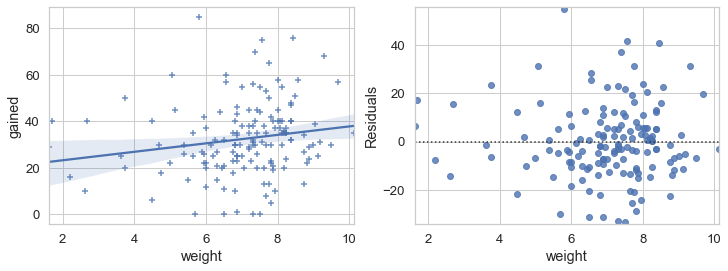

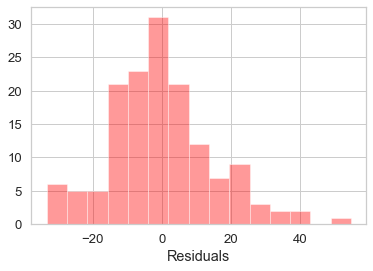

In [4]:
regression_model('weight','gained')

The pearson's r value comparing weight to gained is:
0.175



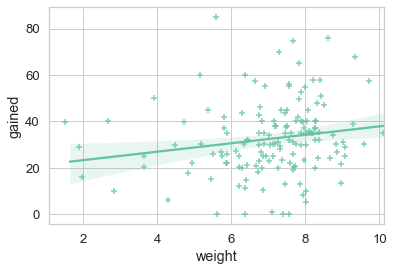

In [4]:
#Source CS51 1.2
# importing dataset and libraries
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns # nice plotting package
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

# data loaded into pandas dataframe
data = pandas.read_csv(r"C:\Users\alina\OneDrive\Desktop\Cornerstone Courses\ASSIGNMENTS\births.csv")
# data = pandas.read_csv("births.csv") # requires csv file loaded into directory

# DEFINE FUNCTIONS

# this function prints the pearson's correlation value for two columns
def pcorr(column_a, column_b):
    print("The pearson's r value comparing", column_a , "to", column_b , "is:")
    print(round(syndata[column_a].corr(syndata[column_b]),3))
    print("")
    
    
#replaces missing data values with the mean of the coloumn
syndata = data.fillna(data.mean())



# this next function prints the pearson's correlation value for two columns
# AND also prints a scatterplot of the data with a trendline 
# NOTE: the plot introduces "jitter" to offset the values 
# so that they are not simply printed on top of one another

def plotpcorr(column_a, column_b):
    pcorr(column_a, column_b)
    sns.set_palette("Set2")
    sns.regplot(x= column_a, y= column_b, data=syndata, marker="+", x_jitter=.25, y_jitter=.25)
    
plotpcorr('weight', 'gained')



In [5]:
#Source CS51 1.2
from scipy import stats

# given summary statistics from data.describe() used above.
r = 0.175
x = 7.039865
y = 32.452703 
sx = 1.506418
sy = 15.657618
n = 148

b1 = r * (sy/sx) # BECAUSE THIS IS SIMPLE REGRESSION
print("b1 =",b1)

SE = (sy/sx)*((1 - r**2)/(n-2))**0.5 # USED THE FORMULA IN THE WHITE PAPER
print("SE =",SE)

t = stats.t.ppf(0.975,n-2) # explain why this is correct by drawing the relevant distribution TWO_TAILED TEST SO WE USE ALPHA/2, ALPHA BEING THE SIGNIFICANCE LEVEL
print("t =",t)

lower_bound = b1 - t*SE # CONFIDENCE INTERVAL 
upper_bound = b1 + t*SE  # CONFIDENCE INTERVAL 

print("interval =", [lower_bound,upper_bound])

b1 = 1.8189394643452212
SE = 0.8469342121322534
t = 1.9763456545827003
interval = [0.14510471448021933, 3.492774214210223]


In [6]:
#Source: Statology.org
import scipy.stats

#find p-value using t-statistic and n-2 degrees of freedom
scipy.stats.t.sf(abs(1.9763456545827003), df=146)

0.025000000000635698